In [26]:
#Visitar la página para más información: https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [43]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [44]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [45]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [46]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
train_images.shape

(60000, 28, 28)

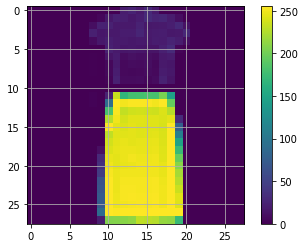

In [49]:
plt.figure()
plt.imshow(train_images[326])
plt.colorbar()
plt.grid(True)

In [50]:
train_images = train_images/255.0
test_images = test_images/255.0

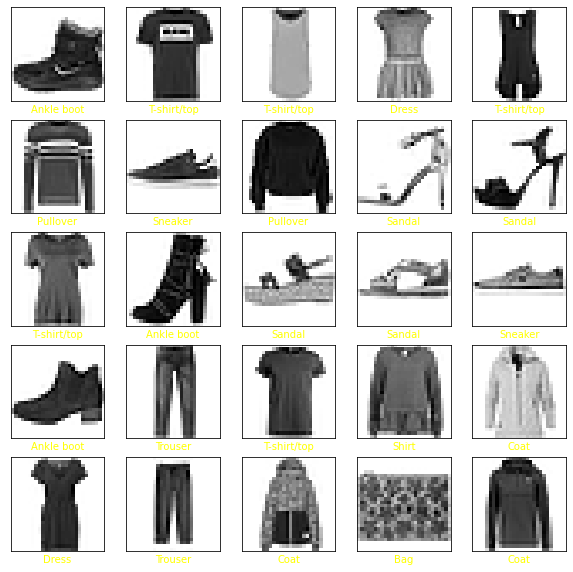

In [72]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color = 'yellow')

In [52]:
model  = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), # Visitar: https://www.tensorflow.org/tutorials/keras/classification
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)])

In [53]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#### EN ALGUNOS CASOS FUNCIONA CON EL SIGUIENTE CÓDIGO; TODO DEPENDE DE LA VERSION DE TENSORFLOW
#model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### O  CON EL SIGUIENTE
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [54]:
model.fit(train_images, train_labels, epochs = 5) #epochs: es el numero de iteraciones para el entrenamiento

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4980 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3742 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.8908


In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8673
Accuracy 0.8672999739646912


In [56]:
predictions = model.predict(test_images)
predictions[0]

array([2.1495632e-07, 2.5160798e-09, 1.8514099e-08, 2.9806230e-08,
       3.9246581e-07, 2.3385132e-02, 9.3666296e-07, 4.7145919e-03,
       1.6215678e-06, 9.7189707e-01], dtype=float32)

Lo anterior es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [57]:
np.argmax(predictions[0]) #Con esto se verifica a cual se le tendrá más confianza

9

En este caso en predictions[i] nos retorna un array con las probabilidades de pertenecer a cada uno de los labels, es decir, la probabilidad de que sea cada prenda(bastaría que lo multipliques por 100 para sacar el porcentaje), por lo que la predicción viene a ser la probabilidad máxima en ese array lo cual lo obtenemos con np.argmax que nos dara el index del valor maximo del array, entonces ya tendríamos el índice de la predicción y bastaría con obtener el nombre de la prenda usando ese index en la lista de los nombres: (class_names[predicted_label])

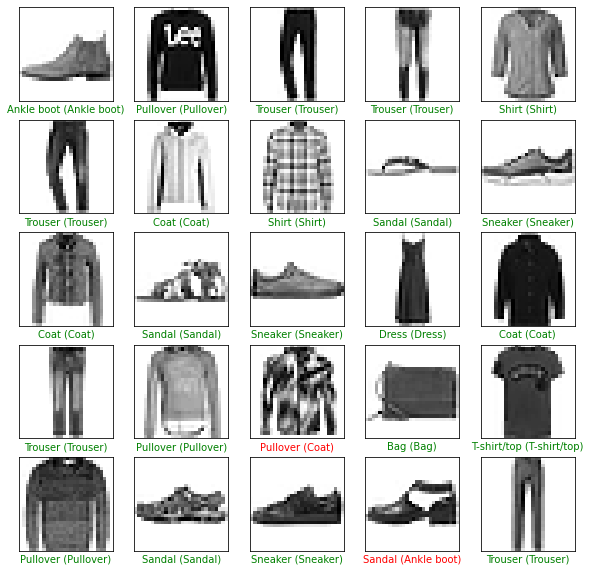

In [71]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        colorText = 'green'
    else:
        colorText = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=colorText)

plt.show()

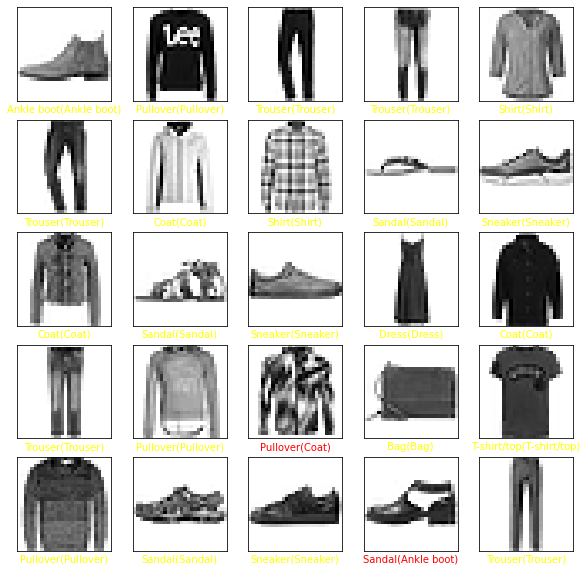

In [69]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])

  plt.grid(False)

  plt.imshow(test_images[i], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red' 

  etiqueta = class_names[predicted_label] + '(' + class_names[true_label] + ')'
  plt.xlabel(etiqueta).set_color(color)